<a href="https://colab.research.google.com/github/justsvykas/lemon_test/blob/main/LemonTestAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here I am going to build LemonTestAI which recognizes different marble categories

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from fastai.vision.all import *

# Dataset

In [ ]:
# Path is fastai object
path = Path('/content/drive/MyDrive/IMGDATA_MARBLE_COUNTRY')

In [ ]:
path_italy = Path('/content/drive/MyDrive/IMGDATA_MARBLE_COUNTRY/ITALY')
path_turkey = Path('/content/drive/MyDrive/IMGDATA_MARBLE_COUNTRY/TURKEY')

In [ ]:
path_carrara = Path('/content/drive/MyDrive/IMGDATA_MARBLE_COUNTRY/ITALY/MARBLE/CARRARA/WHITE')
path_antalya = Path('/content/drive/MyDrive/IMGDATA_MARBLE_COUNTRY/TURKEY/MARBLE/ANTALYA')

First I will try to create a model with Carrara white marble.

In [ ]:
def get_marble_type(x):
    return parent_label(x) # extracts the parent directory name as the label


In [ ]:
def get_marble_type(x):
    label = parent_label(x)
    #print(f"File path: {x}, Extracted label: {label}") # Print file path and extracted label
    return label

In [ ]:
dls = ImageDataLoaders.from_path_func(
    path, get_image_files(path), valid_pct=0.20, seed=42,
    label_func=get_marble_type, item_tfms=Resize(224))

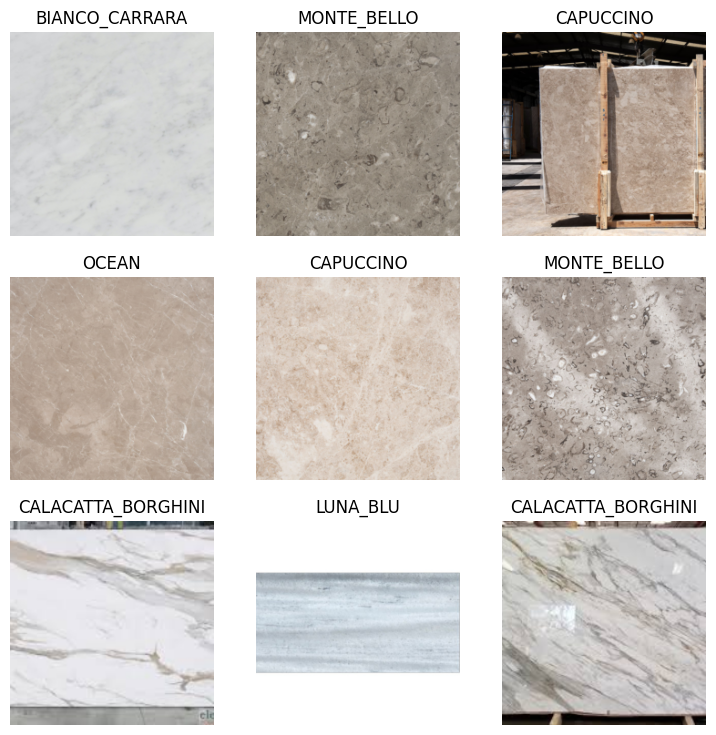

In [ ]:
dls.show_batch()

In [ ]:
files = get_image_files(path)

/content/drive/MyDrive/IMGDATA_MARBLE_COUNTRY/ITALY/MARBLE/CARRARA/WHITE/BIANCO_CARRARA/Product-Gallery_BC-Honed_new.jpg
Product-Gallery_BC-Honed_new.jpg
BIANCO_CARRARA


<Axes: >

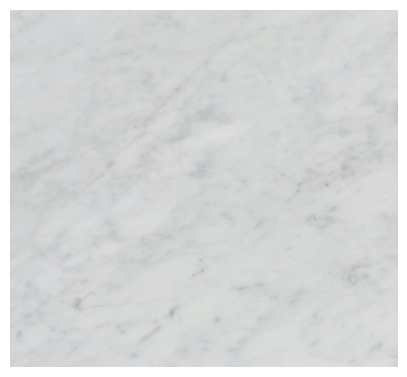

In [ ]:
print(files[0])
print(files[0].name)
print(get_marble_type(files[0]))

img = PILImage.create(files[0])
img.show()

/content/drive/MyDrive/IMGDATA_MARBLE_COUNTRY/ITALY/MARBLE/CARRARA/WHITE/STATUARIO/IMG_7219-600x600.jpg
IMG_7219-600x600.jpg
STATUARIO


<Axes: >

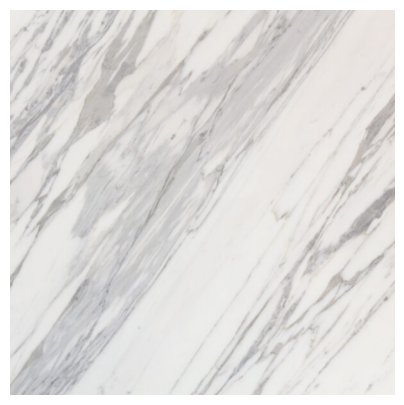

In [ ]:
print(files[30])
print(files[30].name)
print(get_marble_type(files[30]))

img = PILImage.create(files[30])
img.show()

/content/drive/MyDrive/IMGDATA_MARBLE_COUNTRY/ITALY/MARBLE/CARRARA/WHITE/CALACATTA_BORGHINI/download (8).jfif
download (8).jfif
CALACATTA_BORGHINI


<Axes: >

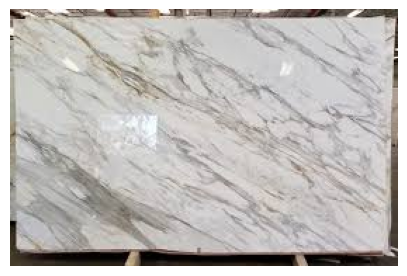

In [ ]:
print(files[45])
print(files[45].name)
print(get_marble_type(files[45]))

img = PILImage.create(files[45])
img.show()

# Train the model

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 39.3MB/s]


In [ ]:
learn.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,4.771802,4.629638,0.975000,00:56


epoch,train_loss,valid_loss,error_rate,time
0,3.763297,3.956797,0.975000,00:04
1,3.296328,3.408246,0.975000,00:05
2,2.974681,2.788348,0.825000,00:03
3,2.537851,2.211555,0.750000,00:03
4,2.190436,1.757340,0.625000,00:05
5,1.901378,1.510572,0.525000,00:03
6,1.655470,1.347500,0.350000,00:03
7,1.445759,1.281153,0.325000,00:04
8,1.279185,1.218927,0.300000,00:03
9,1.142832,1.164842,0.275000,00:03


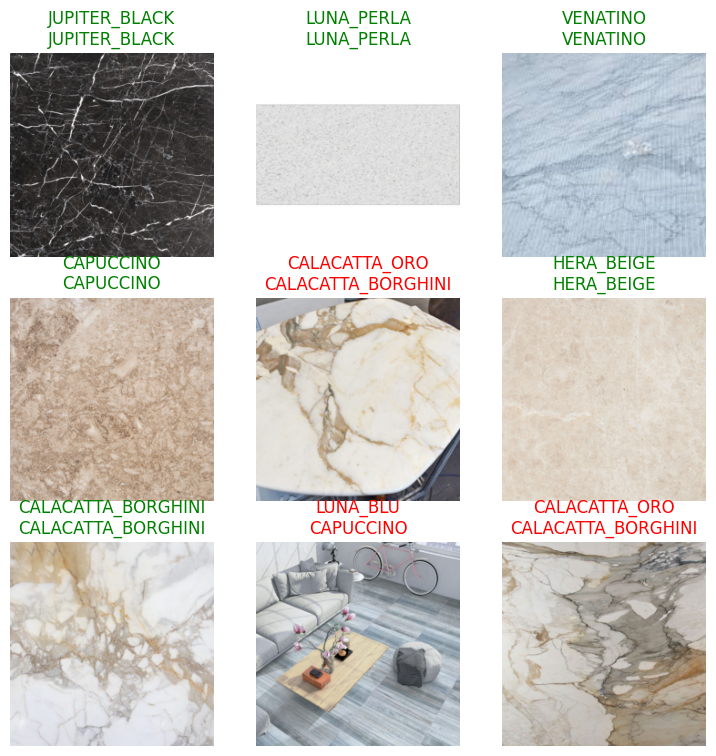

In [ ]:
learn.show_results()

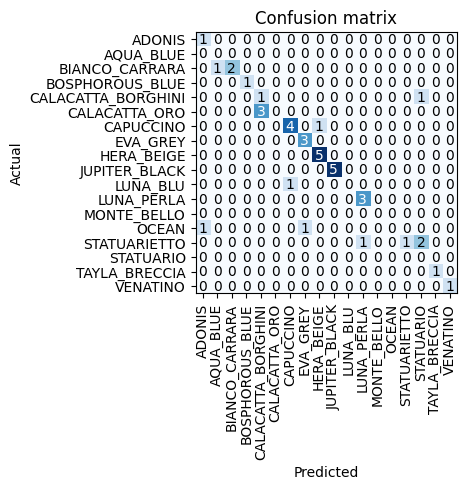

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

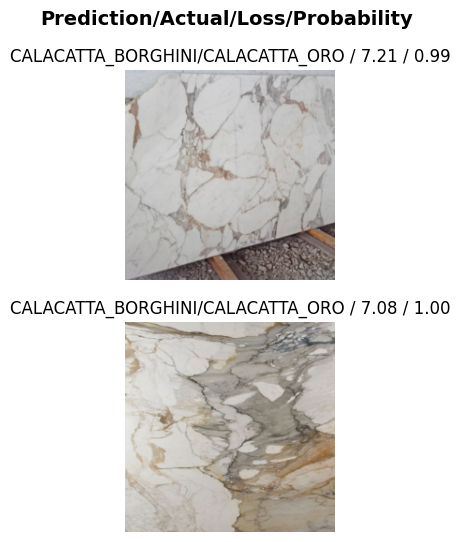

In [ ]:
interp.plot_top_losses(2, nrows=2)